In [1]:
import pandas as pd 
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
def water_potablity():
    data = pd.read_csv('water_potability.csv',header=0) 
    return data

In [3]:
def data_Exploration(data):
    print("Instance = " + str(data.shape[0])+ " and " + "features = " + str(data.shape[1]))
    print(data.info())
    print(data.isnull().sum())
    return None

In [4]:
def train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, 
                                                        random_state=42,
                                                       stratify=y)
    print("Training features"+str(X_train.shape))
    print("Training label"+ str(y_train.shape))
    print("Test features"+ str(X_test.shape))
    print("Test label"+ str(y_test.shape))
    return X_train, X_test, y_train, y_test

In [5]:
data = water_potablity()
data_Exploration(data)

Instance = 3276 and features = 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [6]:
imputer = SimpleImputer(strategy="mean")
water_med = imputer.fit_transform(data)
water_data_clean = pd.DataFrame(water_med, columns=data.columns)

In [7]:
water_data_clean.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
x = water_data_clean.iloc[:,:-1]
x.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656


In [9]:
y = water_data_clean.iloc[:,-1]
y.head(2)

0    0.0
1    0.0
Name: Potability, dtype: float64

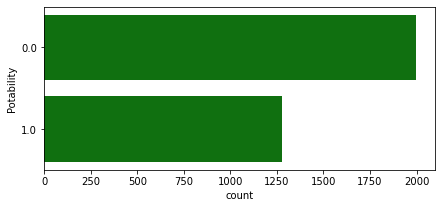

In [10]:
fig, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Potability", data=water_data_clean, color="g")
fig.savefig("Figure2.png",pad_inches=0.1)

In [11]:
Xtrain,Xtest,ytrain,ytest = train_test(x,y)

Training features(2620, 9)
Training label(2620,)
Test features(656, 9)
Test label(656,)


In [12]:
scale = StandardScaler()
scaled_Xtrain = scale.fit_transform(Xtrain)
scaled_Xtest = scale.transform(Xtest)

In [13]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV,validation_curve,learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import tree

import time
import numpy as np

 It took 0.041948795318603516 seconds 
0.6036585365853658


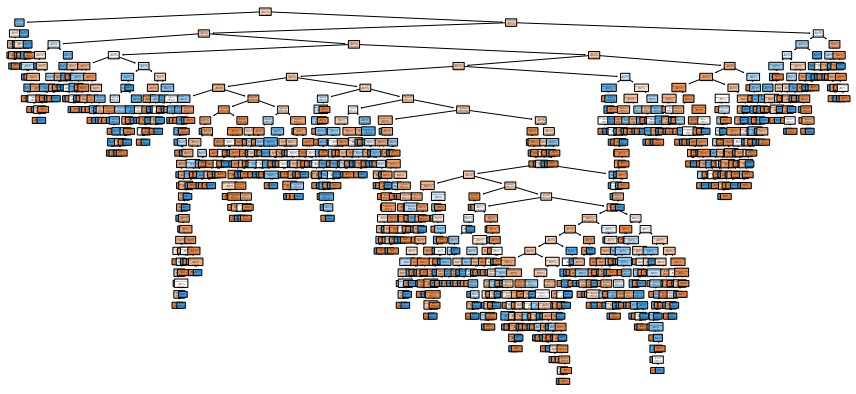

In [14]:
start_time = time.time()
decisionTree = DecisionTreeClassifier(random_state=42)
decisionTree.fit(scaled_Xtrain,ytrain)
BC_predSCore = decisionTree.predict(scaled_Xtest)
print(" It took %s seconds " % (time.time() - start_time))
print(accuracy_score(ytest,BC_predSCore))

plt.figure(figsize=(15,7))
tree.plot_tree(decisionTree, filled=True, rounded=True,class_names=["Not Potable","Potable"], feature_names = water_data_clean.columns);
plt.savefig('treeWP.png',format='png',bbox_inches = "tight")


In [90]:
pruning_decisionTree = DecisionTreeClassifier(criterion="gini", splitter='random',
                                              max_leaf_nodes=10,
                                              min_samples_leaf = 3,
                                              max_depth = 4,
                                              random_state=42)
pruning_decisionTree.fit(scaled_Xtrain,ytrain)
bc_pruning_predict = pruning_decisionTree.predict(scaled_Xtest)
accuracy_score(ytest,bc_pruning_predict)

0.6326219512195121

In [126]:
def plot_learning_curve(x,y):
    dt = DecisionTreeClassifier(criterion= 'gini',
                                   max_depth= 4,
                                   min_samples_leaf= 1,
                                   min_samples_split= 8,
                                   splitter= 'random',
                                   random_state=42)
    
    
    train_sizes, train_scores, test_scores = learning_curve(dt,x,y, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
    
    dt.fit(x,y)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Learning Curve - Water Quality")
    plt.legend("best")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Scoare")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    plt.tight_layout()
    plt.legend(loc = 'best')
  
    plt.ylim(-.1,1.1)
    plt.savefig('LearningCurveBCWQ.png',format='png',bbox_inches = "tight")
    plt.show()
    
    


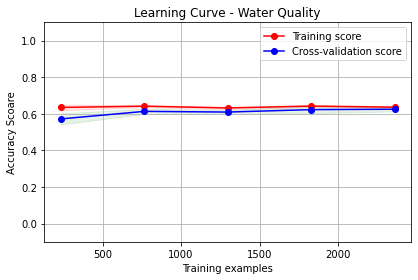

In [127]:
plot_learning_curve(scaled_Xtrain,ytrain)

In [95]:
def plot_validation_curve(x,y):
    dt = DecisionTreeClassifier(criterion= 'gini',
                                   min_samples_leaf= 1,
                                   min_samples_split= 8,
                                   splitter= 'random',
                                   random_state=42)
    

    
    train_score, test_score= validation_curve(dt,x,y,param_name="max_depth",param_range=np.arange(1,20),
                                        cv=10, scoring="accuracy")
    dt.fit(x,y)
    # Calculating mean and standard deviation of training score
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)
    
    plt.grid()

    # Plot mean accuracy scores for training and testing scores
    plt.plot(np.arange(1,20), mean_train_score,
         label = "Training Score",color = 'r')
    plt.plot(np.arange(1,20), mean_test_score,
       label = "Cross Validation Score", color = 'b')

    # Creating the plot
    plt.title(" DT - Validation Curve Water Qality")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.savefig('ValidationCurveBCDW.png',format='png',bbox_inches = "tight")
    plt.show()

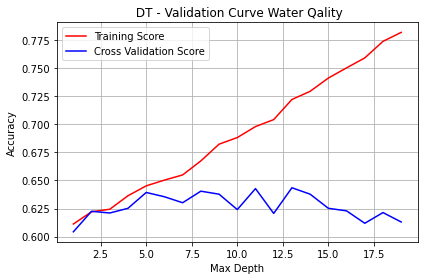

In [96]:
plot_validation_curve(scaled_Xtrain,ytrain)

In [136]:

def pruning_clf():
    
    clfs = DecisionTreeClassifier(criterion="gini", splitter='random',
                                              max_leaf_nodes=10,
                                              min_samples_leaf = 3,
                                              max_depth = 4,
                                              random_state=42)
    path = clfs.cost_complexity_pruning_path(Xtrain,ytrain)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    
    
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(criterion="gini", splitter='random',
                                              max_leaf_nodes=10,
                                              min_samples_leaf = 3,
                                              max_depth = 4,
                                              random_state=42,ccp_alpha=ccp_alpha)
        clf.fit(Xtrain, ytrain)
        clfs.append(clf)
    train_scores = [clf.score(scaled_Xtrain,ytrain) for clf in clfs]
    test_scores = [clf.score(scaled_Xtest, ytest) for clf in clfs]

    print("mean" + str(ccp_alphas.mean()))
    
    fig, ax = plt.subplots()
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing sets")
    ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
    plt.grid()
    ax.legend(loc='best')
    plt.savefig('ckfdtbcc.png',format='png',bbox_inches = "tight")
    plt.show()




mean0.0014964220261552118


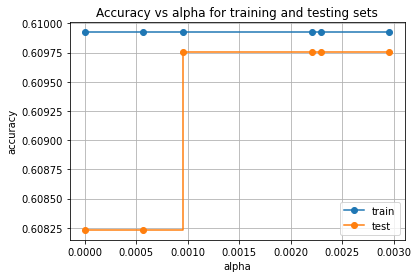

In [137]:
pruning_clf()

# Hyperparameter Tuning 

In [97]:
def gridSearch(X,y):
    start_time = time.time()
    param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth" : np.arange(1,20,1),
    "splitter": ['best', 'random'],
    "min_samples_split":range(2,10,1),
    "min_samples_leaf":range(1,30,2),
    }
    model = DecisionTreeClassifier(random_state=42)
    gv = GridSearchCV(model,param_grid=param_dict,cv=10,n_jobs=-1)
    gv.fit(X,y)
    print(" It took %s seconds " % (time.time() - start_time))
    return gv.best_score_,gv.best_params_
    

In [98]:
gridSearch(scaled_Xtrain,ytrain)

 It took 120.6542661190033 seconds 


(0.6515267175572519,
 {'criterion': 'gini',
  'max_depth': 14,
  'min_samples_leaf': 1,
  'min_samples_split': 7,
  'splitter': 'random'})

In [114]:
model = DecisionTreeClassifier(criterion= 'gini',
  max_depth= 14,
  min_samples_leaf= 1,
  min_samples_split= 7,
  splitter= 'random',
    random_state=42)
model.fit(scaled_Xtrain,ytrain)
hyperTuningPredict = model.predict(scaled_Xtest)
accuracy_score(ytest,hyperTuningPredict)

0.6402439024390244

In [214]:
print(confusion_matrix(ytest, hyperTuningPredict))
      
print ("Accuracy : ",
    accuracy_score(ytest,hyperTuningPredict)*100)
      
print(classification_report(ytest, hyperTuningPredict))


[[347  53]
 [183  73]]
Accuracy :  64.02439024390245
              precision    recall  f1-score   support

         0.0       0.65      0.87      0.75       400
         1.0       0.58      0.29      0.38       256

    accuracy                           0.64       656
   macro avg       0.62      0.58      0.56       656
weighted avg       0.63      0.64      0.60       656



In [118]:
def post_purning():
    clfs = DecisionTreeClassifier(criterion= 'gini',
      max_depth= 14,
      min_samples_leaf= 1,
      min_samples_split= 7,
      splitter= 'random',
        random_state=42)
    path = clfs.cost_complexity_pruning_path(scaled_Xtrain,ytrain)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(max_depth= 14,criterion= 'gini',
      min_samples_leaf= 1,
      min_samples_split= 7,
      splitter= 'random',
        random_state=42, ccp_alpha=ccp_alpha)
        clf.fit(scaled_Xtrain, ytrain)
        clfs.append(clf)
        
    train_scores = [clf.score(scaled_Xtrain,ytrain) for clf in clfs]
    test_scores = [clf.score(scaled_Xtest, ytest) for clf in clfs]

    print(ccp_alphas.mean())
    
    fig, ax = plt.subplots()
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing sets")
    ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
    plt.grid()
    ax.legend()
    plt.savefig('dt_postpruning.png',format='png',bbox_inches = "tight")
    plt.show()


0.0005970703447844717


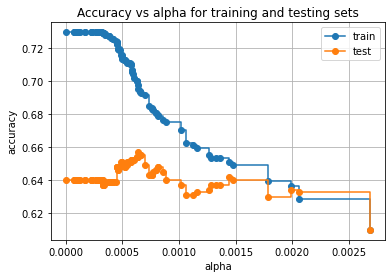

In [119]:
post_purning()

In [124]:
def dt_plot_learning_curve(x,y):
    dt = DecisionTreeClassifier(criterion= 'gini',
                                  max_depth= 14,
                                  min_samples_leaf= 1,
                                  min_samples_split= 7,
                                  splitter= 'random',
                                    random_state=42,
                                    ccp_alpha=0.00059)

    
    train_sizes, train_scores, test_scores = learning_curve(dt,x,y, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
    
    dt.fit(x,y)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Learning Curve - Water Quality")
    plt.legend("best")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Scoare")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    plt.tight_layout()
    plt.legend(loc = 'best')
  
    plt.ylim(-.1,1.1)
    plt.savefig('LearningCurveDTWQ.png',format='png',bbox_inches = "tight")
    plt.show()
    
    


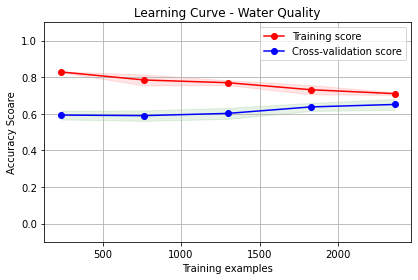

In [125]:
dt_plot_learning_curve(scaled_Xtrain,ytrain)

In [129]:
def dt_plot_validation_curve(x,y):
    dt = DecisionTreeClassifier(criterion= 'gini',
                                  max_depth= 14,
                                  min_samples_leaf= 1,
                                  min_samples_split= 7,
                                  splitter= 'random',
                                    random_state=42,
                                    ccp_alpha=0.00059)
    

    
    train_score, test_score= validation_curve(dt,x,y,param_name="max_depth",param_range=np.arange(1,20),
                                        cv=10, scoring="accuracy")
    dt.fit(x,y)
    # Calculating mean and standard deviation of training score
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)
    
    plt.grid()

    # Plot mean accuracy scores for training and testing scores
    plt.plot(np.arange(1,20), mean_train_score,
         label = "Training Score",color = 'r')
    plt.plot(np.arange(1,20), mean_test_score,
       label = "Cross Validation Score", color = 'b')

    # Creating the plot
    plt.title(" DT - Validation Curve Water Qality")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.savefig('DTValidationCurveWQ.png',format='png',bbox_inches = "tight")
    plt.show()

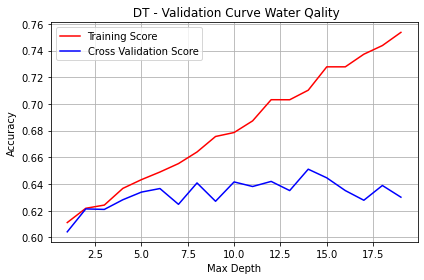

In [130]:
dt_plot_validation_curve(scaled_Xtrain,ytrain)

In [131]:
newmodel = DecisionTreeClassifier(criterion= 'gini',
  max_depth= 14,
  min_samples_leaf= 1,
  min_samples_split= 7,
  splitter= 'random',
    random_state=42,
    ccp_alpha=0.00059)
newmodel.fit(scaled_Xtrain, ytrain)
newhyperTuningPredict = newmodel.predict(scaled_Xtest)
accuracy_score(ytest,newhyperTuningPredict)

0.6524390243902439

In [215]:
print(confusion_matrix(ytest, newhyperTuningPredict))
      
print ("Accuracy : ",
    accuracy_score(ytest, newhyperTuningPredict)*100)
      
print(classification_report(ytest, newhyperTuningPredict))


[[353  47]
 [181  75]]
Accuracy :  65.2439024390244
              precision    recall  f1-score   support

         0.0       0.66      0.88      0.76       400
         1.0       0.61      0.29      0.40       256

    accuracy                           0.65       656
   macro avg       0.64      0.59      0.58       656
weighted avg       0.64      0.65      0.62       656



In [134]:
def createTree():    
    dt = DecisionTreeClassifier(criterion= 'gini',
          max_depth= 14,
          min_samples_leaf= 1,
          min_samples_split= 7,
          splitter= 'random',
            random_state=42,
            ccp_alpha=0.00059)

    dt.fit(scaled_Xtrain,ytrain)
    BC_predSCore = dt.predict(scaled_Xtest)
    accuracy_score(ytest,BC_predSCore)
    print(" It took %s seconds " % (time.time() - start_time))

    plt.figure(figsize=(15,7))
    tree.plot_tree(dt, filled=True, rounded=True,class_names=["Not Potable","Potable"], feature_names = water_data_clean.columns);
    plt.savefig('dttreeWP.png',format='png',bbox_inches = "tight")

 It took 12818.403563976288 seconds 


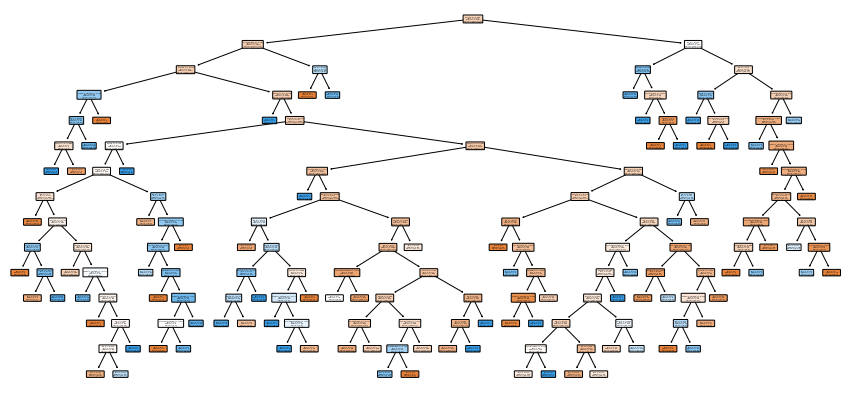

In [135]:
createTree()

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
def default_knn(X_train,Y_train,X_test,Y_test):
    start_time = time.time()
    knn = KNeighborsClassifier()
    knn.fit(X_train,Y_train)
    knn_pred = knn.predict(X_test)
    print(" It took %s seconds " % (time.time() - start_time)) 
    return accuracy_score(Y_test,knn_pred)
    

In [182]:
default_knn(scaled_Xtrain,ytrain,scaled_Xtest,ytest)

 It took 0.04444432258605957 seconds 


0.6112804878048781

In [35]:
def KNN_neighbor(X_train,Y_train,X_test,Y_test):
    neighbor = np.arange(1,30,1)
    neighborarr = []
    for i in neighbor:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,Y_train)
        neighborarr.append(knn)
        
    train_scores = [knn.score(X_train,Y_train) for knn in neighborarr]
    test_scores = [knn.score(X_test,Y_test) for knn in neighborarr]
    print(np.mean(train_scores))
    print(np.mean(test_scores))
    fig, ax = plt.subplots()
    ax.set_xlabel("Neighbor")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs KNN Neighbor for training and testing sets")
    ax.plot(neighbor, train_scores, marker="o", label="train" )
    ax.plot(neighbor, test_scores, marker="o", label="test")
    ax.legend()
    plt.grid()
    plt.show()
    
    

0.7183206106870228
0.6250525651808242


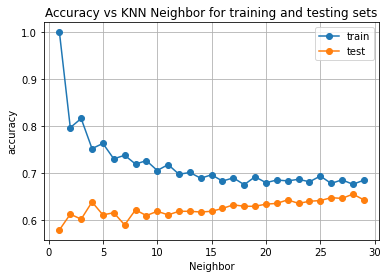

In [36]:
KNN_neighbor(scaled_Xtrain, ytrain,scaled_Xtest,ytest)

In [193]:
def plot_knn_learning_curve(x,y):
    knnModel = KNeighborsClassifier(n_neighbors=20)
    
    train_sizes, train_scores, test_scores = learning_curve(knnModel, x,y, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
    
    knnModel.fit(x,y)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    print(train_scores_mean)
    print(test_scores_mean)
    plt.figure()
    plt.title("KNN Learning Curve - Water Quality")
    plt.legend("best")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Scoare")
    #plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    #plt.tight_layout()
    plt.legend(loc = 'best')
      
    plt.ylim(-.1,1,.10)
    plt.savefig('KNNLearningCurveWater.png',format='png',bbox_inches = "tight")
    plt.show()
    

[0.6306383  0.65913838 0.67986111 0.68024083 0.68142494]
[0.61335878 0.63358779 0.65152672 0.65076336 0.65152672]


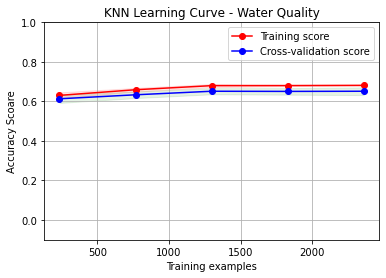

In [194]:
plot_knn_learning_curve(scaled_Xtrain, ytrain)

In [197]:
def knn_validationCurve(x,y):
    parameter_range = np.arange(1, 20, 1)
    train_score, test_score = validation_curve(KNeighborsClassifier(),x,y,
                                           param_name = "n_neighbors",
                                           param_range = parameter_range,
                                            cv = 5, scoring = "accuracy")
    print(train_score, test_score)
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(parameter_range, mean_train_score,
         label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score,
       label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with KNN Classifier")
    plt.xlabel("Number of Neighbours")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.savefig('KNNValidationCurveWater.png',format='png',bbox_inches = "tight")
    plt.show()

[[1.         1.         1.         1.         1.        ]
 [0.80104962 0.79389313 0.79198473 0.79103053 0.79198473]
 [0.8105916  0.8129771  0.8134542  0.80343511 0.8096374 ]
 [0.76526718 0.7476145  0.7519084  0.7490458  0.7509542 ]
 [0.76526718 0.75333969 0.75572519 0.76049618 0.75524809]
 [0.73950382 0.72041985 0.72566794 0.72375954 0.72566794]
 [0.7471374  0.73282443 0.73234733 0.74093511 0.73139313]
 [0.72519084 0.70753817 0.70849237 0.71469466 0.72089695]
 [0.73759542 0.72185115 0.72232824 0.72471374 0.71946565]
 [0.71421756 0.70229008 0.70896947 0.70801527 0.70372137]
 [0.72089695 0.71040076 0.71564885 0.72089695 0.70658397]
 [0.69513359 0.6870229  0.69561069 0.70324427 0.69131679]
 [0.70992366 0.69895038 0.70610687 0.70896947 0.70038168]
 [0.6879771  0.6860687  0.69083969 0.69227099 0.6846374 ]
 [0.70181298 0.6879771  0.69704198 0.69704198 0.6894084 ]
 [0.6860687  0.68320611 0.68368321 0.6851145  0.6865458 ]
 [0.69608779 0.6860687  0.69417939 0.6903626  0.6903626 ]
 [0.68320611 0

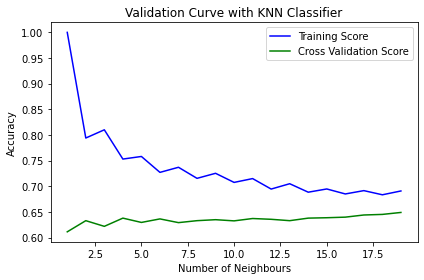

In [198]:
knn_validationCurve(scaled_Xtrain, ytrain)

In [41]:
def KNN_comparision():
    knnModel = KNeighborsClassifier(algorithm = 'auto',
                                    leaf_size = 2,
                                    n_neighbors= 3,
                                    weights = 'distance')
    knnModel.fit(scaled_Xtrain, ytrain)
    knnPredict = knnModel.predict(scaled_Xtest)
    accuracy_score(ytest,knnPredict)
    
    print("Confusion Matrix: ",confusion_matrix(ytest, knnPredict))
      
    print ("Accuracy : ",accuracy_score(ytest, knnPredict)*100)
      
    print("Report : ", classification_report(ytest, knnPredict))

    

In [42]:
KNN_comparision()

Confusion Matrix:  [[300 100]
 [160  96]]
Accuracy :  60.36585365853659
Report :                precision    recall  f1-score   support

         0.0       0.65      0.75      0.70       400
         1.0       0.49      0.38      0.42       256

    accuracy                           0.60       656
   macro avg       0.57      0.56      0.56       656
weighted avg       0.59      0.60      0.59       656



In [43]:
def knnGridSearch(X,y):
    start_time = time.time()
    param_dict = {
    "weights": ['uniform', 'distance'],
    "n_neighbors" : np.arange(1,30,1),
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size":range(2,30,2)
    }
    knnModel = KNeighborsClassifier()
    gv = GridSearchCV(knnModel,param_grid=param_dict,cv=10,n_jobs=-1)
    gv.fit(X,y)
    print(" It took %s seconds " % (time.time() - start_time))
    return gv.best_score_,gv.best_params_

In [44]:
knnGridSearch(scaled_Xtrain, ytrain)

 It took 81.79171991348267 seconds 


(0.6595419847328245,
 {'algorithm': 'auto',
  'leaf_size': 2,
  'n_neighbors': 27,
  'weights': 'distance'})

In [199]:
def KNNAfterNuning():
    knnModel = KNeighborsClassifier(algorithm = 'auto',
                                    leaf_size = 2,
                                    n_neighbors= 27,
                                    weights = 'distance')
    knnModel.fit(scaled_Xtrain, ytrain)
    knnPredict = knnModel.predict(scaled_Xtest)
    accuracy_score(ytest,knnPredict)
    
    print(confusion_matrix(ytest, knnPredict))
      
    print ("Accuracy : ",accuracy_score(ytest, knnPredict)*100)
      
    print(classification_report(ytest, knnPredict))

    



In [200]:
KNNAfterNuning()

[[372  28]
 [204  52]]
Accuracy :  64.63414634146342
              precision    recall  f1-score   support

         0.0       0.65      0.93      0.76       400
         1.0       0.65      0.20      0.31       256

    accuracy                           0.65       656
   macro avg       0.65      0.57      0.54       656
weighted avg       0.65      0.65      0.59       656



# SVM

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

In [149]:
def svmDefault(X_train,Y_train,X_test,Y_test):
    start_time = time.time()
    svmModel = SVC(random_state=42)
    svmModel.fit(X_train,Y_train)
    y_pred_svm = svmModel.predict(X_test)
    print(" It took %s seconds " % (time.time() - start_time)) 
    return "Accuracy:",accuracy_score(Y_test, y_pred_svm)

In [150]:
svmDefault(scaled_Xtrain,ytrain,scaled_Xtest,ytest)

 It took 0.461698055267334 seconds 


('Accuracy:', 0.6692073170731707)

In [167]:
def plot_SVM_learning_curve(X,y):
    #cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    svmModel = SVC()
    
    train_sizes, train_scores, test_scores = learning_curve(svmModel,X,y,
                                                            n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
    
    svmModel.fit(X,y)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("SVM Learning Curve - Water Quality")
    plt.legend("best")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Scoare")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.ylim(-.1,1.10,.10)
    plt.savefig('svm_waterlearningCUrve.png',format='png',bbox_inches = "tight")
  
    plt.show()

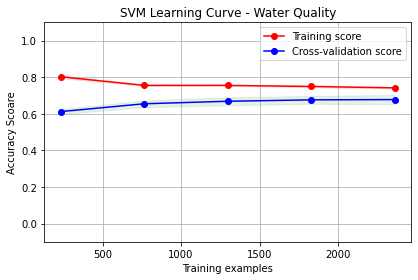

In [168]:
plot_SVM_learning_curve(scaled_Xtrain,ytrain)

In [169]:
def SVM_validationCurve(X,y):
    parameter_range = np.arange(0.1, 1,.1 )
    
    train_score, test_score = validation_curve(SVC(),X,y,
                                           param_name = "C",
                                           param_range = parameter_range,
                                            cv = 10, scoring = "accuracy")
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(parameter_range, mean_train_score,
         label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score,
       label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with SVM Classifier")
    plt.xlabel("C")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.savefig('svm_waterlearningCUrve.png',format='png',bbox_inches = "tight")
    plt.show()

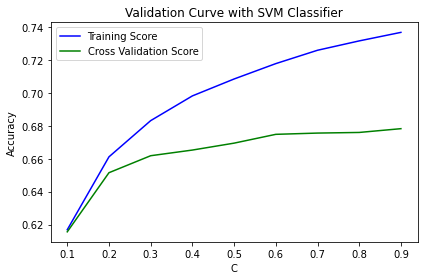

In [170]:
SVM_validationCurve(scaled_Xtrain,ytrain)

In [220]:
def SVMComparision(x,y,xtext,Ytest):
    SVM_model = SVC(C = 0.01, gamma = 0.001, kernel = 'linear')
    SVM_model.fit(x,y)
    SVM_Predict = SVM_model.predict(xtext)
    accuracy_score(Ytest,SVM_Predict)
    
    print(confusion_matrix(Ytest, SVM_Predict))
      
    print ("Accuracy : ",accuracy_score(ytest, SVM_Predict)*100)
      
    print(classification_report(Ytest, SVM_Predict))

    
    

In [221]:
SVMComparision(scaled_Xtrain,ytrain,scaled_Xtest,ytest)

[[400   0]
 [256   0]]
Accuracy :  60.97560975609756
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       400
         1.0       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



In [175]:
def svmTuning(X,y):
    start_time = time.time()
    model = SVC(random_state=42,C=0.01)
    param_grid = {'gamma' : [0.001, 0.01, 0.1, 1],
                 'kernel': ['linear','rbf']}

    
    gv = GridSearchCV(model, param_grid, cv=50)
    gv.fit(X,y)
    print(" It took %s seconds " % (time.time() - start_time))
    return gv.best_score_,gv.best_params_

In [176]:
svmTuning(scaled_Xtrain,ytrain)

 It took 98.50467419624329 seconds 


(0.6099709724238026, {'gamma': 0.001, 'kernel': 'linear'})

In [218]:
def SVMAfterTuning(x,y,xtext,Ytest):
    SVM_model = SVC(C = 0.01, gamma = 0.001, kernel = 'linear')
    SVM_model.fit(x,y)
    SVM_Predict = SVM_model.predict(xtext)
    accuracy_score(Ytest,SVM_Predict)
    
    print(confusion_matrix(Ytest, SVM_Predict))
      
    print ("Accuracy : ",accuracy_score(ytest, SVM_Predict)*100)
      
    print(classification_report(Ytest, SVM_Predict))

    

In [219]:
SVMAfterTuning(scaled_Xtrain,ytrain,scaled_Xtest,ytest)

[[400   0]
 [256   0]]
Accuracy :  60.97560975609756
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       400
         1.0       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



# Ada Boosting

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [138]:
def comparisionADA():
    start_time = time.time()
    adaboostModel = AdaBoostClassifier(DecisionTreeClassifier(
    max_depth=4,splitter = 'random',criterion='gini',min_samples_leaf=1,min_samples_split=8), n_estimators=1)
    adaboostModel.fit(scaled_Xtrain,ytrain)
    adaboostModelPred = adaboostModel.predict(scaled_Xtest)
    print("Accuracy:",accuracy_score(ytest, adaboostModelPred))
    print(" It took %s seconds " % (time.time() - start_time))

In [139]:
comparisionADA()

Accuracy: 0.6128048780487805
 It took 0.014121055603027344 seconds 


In [63]:
def plot_ADA_learning_curve_compraision(X,y):
    #cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    adaboostModel_learningCurve = AdaBoostClassifier(DecisionTreeClassifier(
    max_depth=4,splitter = 'random',criterion='gini',min_samples_leaf=1,min_samples_split=8,random_state=42), n_estimators=1)
    
    train_sizes, train_scores, test_scores = learning_curve(adaboostModel_learningCurve,X,y,
                                                            n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
    
    adaboostModel_learningCurve.fit(X,y)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("ADA Learning Curve - Water Quality")
    plt.legend("best")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Scoare")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.ylim(-.1,1.10,.10)
   
  
    plt.show()

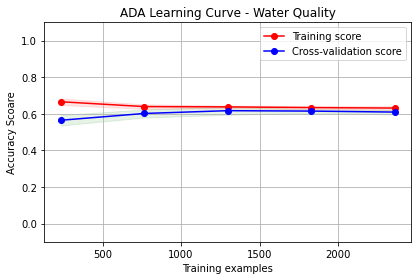

In [64]:
plot_ADA_learning_curve_compraision(scaled_Xtrain,ytrain)

In [65]:
def ada_validationCurve_comparision(X,y):
    parameter_range = np.arange(1, 11, 1)
    
    train_score, test_score = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(
    max_depth=4,splitter = 'random',criterion='gini',min_samples_leaf=1,min_samples_split=8, random_state=42)),X,y,
                                           param_name = "n_estimators",
                                           param_range = parameter_range,
                                            cv = 10, scoring = "accuracy")
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(parameter_range, mean_train_score,
         label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score,
       label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with ADA boost")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.show()

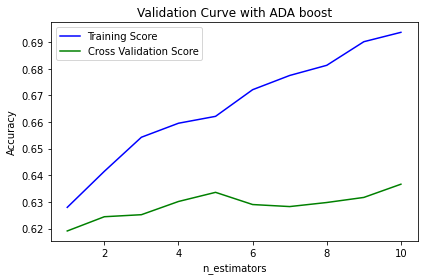

In [66]:
ada_validationCurve_comparision(scaled_Xtrain,ytrain)

In [67]:
def adaAfterTuning_comparision(x,y,xtext,Ytest):
    adaModel = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4,
                                                         splitter = 'random',
                                                         criterion='gini',
                                                         min_samples_leaf=1,
                                                         min_samples_split=8, 
                                                         random_state=42),
                                  algorithm='SAMME',
                                  learning_rate=0.7000000000000001,
                                  n_estimators = 71
                                 )
    
    
    
    adaModel.fit(x,y)
    Ada_Predict = adaModel.predict(xtext)
    accuracy_score(Ytest,Ada_Predict)
    
    print("Confusion Matrix: ",confusion_matrix(Ytest, Ada_Predict))
      
    print ("Accuracy : ",accuracy_score(ytest, Ada_Predict)*100)
      
    print("Report : ", classification_report(Ytest, Ada_Predict))


In [68]:
adaAfterTuning_comparision(scaled_Xtrain,ytrain,scaled_Xtest,ytest)

Confusion Matrix:  [[351  49]
 [192  64]]
Accuracy :  63.262195121951216
Report :                precision    recall  f1-score   support

         0.0       0.65      0.88      0.74       400
         1.0       0.57      0.25      0.35       256

    accuracy                           0.63       656
   macro avg       0.61      0.56      0.55       656
weighted avg       0.62      0.63      0.59       656



Boosting with Water DataQuality

In [140]:
def ADA():
    start_time = time.time()
    adaboostModel = AdaBoostClassifier(DecisionTreeClassifier(criterion= 'gini',
      max_depth= 14,
      min_samples_leaf= 1,
      min_samples_split= 7,
      splitter= 'random',
        random_state=42,
        ccp_alpha=0.00059),n_estimators = 1)
    adaboostModel.fit(scaled_Xtrain,ytrain)
    adaboostModelPred = adaboostModel.predict(scaled_Xtest)
    print("Accuracy:",accuracy_score(ytest, adaboostModelPred))
    print(" It took %s seconds " % (time.time() - start_time)) 




In [141]:
ADA()

Accuracy: 0.6295731707317073
 It took 0.010196208953857422 seconds 


In [142]:
def plot_ADA_learning_curve(X,y):
    #cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    adaboostModel_learningCurve = AdaBoostClassifier(DecisionTreeClassifier(criterion= 'gini',
      max_depth= 14,
      min_samples_leaf= 1,
      min_samples_split= 7,
      splitter= 'random',
        random_state=42,
        ccp_alpha=0.00059),n_estimators = 1)
    
    train_sizes, train_scores, test_scores = learning_curve(adaboostModel_learningCurve,X,y,
                                                            n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
    
    adaboostModel_learningCurve.fit(X,y)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("ADA Learning Curve - Water Quality")
    plt.legend("best")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Scoare")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.ylim(-.1,1.10,.10)
    plt.savefig('adaLearningCurveWQ.png',format='png',bbox_inches = "tight")

  
    plt.show()

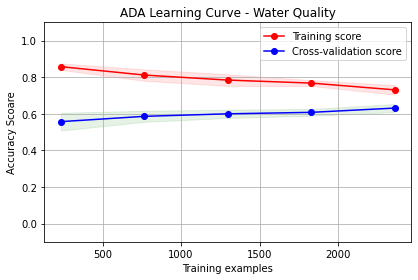

In [143]:
plot_ADA_learning_curve(scaled_Xtrain,ytrain)

In [145]:
def ada_validationCurve(X,y):
    parameter_range = np.arange(1, 20, 1)
    train_score, test_score = validation_curve(
        AdaBoostClassifier(
            DecisionTreeClassifier(
                criterion= 'gini',
                max_depth= 14,
                min_samples_leaf= 1,
                min_samples_split= 7,
                splitter= 'random',
                random_state=42,
                ccp_alpha=0.00059)),X,y,
    param_name = "n_estimators",
    param_range = parameter_range,
    cv = 10, scoring = "accuracy")
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(parameter_range, mean_train_score,
         label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score,
       label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with ADA boost")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.savefig('adaValidationCurveWQ.png',format='png',bbox_inches = "tight")
    plt.show()

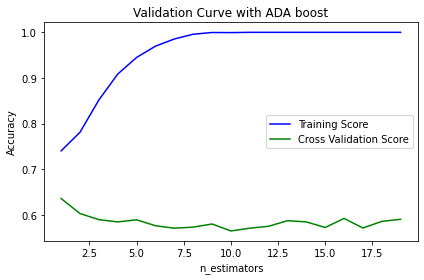

In [146]:
ada_validationCurve(scaled_Xtrain,ytrain)

In [75]:
def adaGV(X,y):
    start_time = time.time()
    
    model = AdaBoostClassifier(DecisionTreeClassifier(
                criterion= 'gini',
                max_depth= 14,
                min_samples_leaf= 1,
                min_samples_split= 7,
                splitter= 'random',
                random_state=42,
                ccp_alpha=0.00059)
      
    )
    param_grid = {'n_estimators': np.arange(1, 100, 10),
                  'learning_rate' : np.arange(0.1, 1, .1),
                  'algorithm': ['SAMME', 'SAMME.R']}

    
    gv = GridSearchCV(model, param_grid, cv=10)
    gv.fit(X,y)
    print(" It took %s seconds " % (time.time() - start_time))
    return gv.best_score_,gv.best_params_

In [76]:
adaGV(scaled_Xtrain,ytrain)

 It took 238.6458089351654 seconds 


(0.6721374045801527,
 {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 61})

In [216]:
def adaAfterTuning(x,y,xtext,Ytest):
    adaModel = AdaBoostClassifier(DecisionTreeClassifier(
                criterion= 'gini',
                max_depth= 14,
                min_samples_leaf= 1,
                min_samples_split= 7,
                splitter= 'random',
                random_state=42,
                ccp_alpha=0.00059),
                                  algorithm='SAMME',
                                  learning_rate=0.1,
                                  n_estimators = 61
                                 )
    
    
    
    adaModel.fit(x,y)
    Ada_Predict = adaModel.predict(xtext)
    accuracy_score(Ytest,Ada_Predict)
    
    print(confusion_matrix(ytest, Ada_Predict))
      
    print ("Accuracy : ",accuracy_score(ytest, Ada_Predict)*100)
      
    print(classification_report(ytest, Ada_Predict))


In [217]:
adaAfterTuning(scaled_Xtrain,ytrain,scaled_Xtest,ytest)

[[356  44]
 [171  85]]
Accuracy :  67.22560975609755
              precision    recall  f1-score   support

         0.0       0.68      0.89      0.77       400
         1.0       0.66      0.33      0.44       256

    accuracy                           0.67       656
   macro avg       0.67      0.61      0.60       656
weighted avg       0.67      0.67      0.64       656



# Neural Network

In [79]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [201]:
def nncompraision():
    start_time = time.time()
    NNModel = MLPClassifier(random_state=40)
    NNModel.fit(scaled_Xtrain,ytrain)
    nnmodelPrect = NNModel.predict(scaled_Xtest)
    
    print("Confusion Matrix: ",confusion_matrix(ytest, nnmodelPrect))
      
    print ("Accuracy : ",accuracy_score(ytest, nnmodelPrect)*100)
      
    print("Report : ", classification_report(ytest, nnmodelPrect))
    print(" It took %s seconds " % (time.time() - start_time)) 


In [202]:
nncompraision()

Confusion Matrix:  [[325  75]
 [143 113]]
Accuracy :  66.76829268292683
Report :                precision    recall  f1-score   support

         0.0       0.69      0.81      0.75       400
         1.0       0.60      0.44      0.51       256

    accuracy                           0.67       656
   macro avg       0.65      0.63      0.63       656
weighted avg       0.66      0.67      0.66       656

 It took 2.139881134033203 seconds 


In [ ]:
start_time = time.time()
NNModel = MLPClassifier(random_state=40)
NNModel.fit(Xtrain,ytrain)
nnmodelPrect = NNModel.predict(Xtest)
print(" It took %s seconds " % (time.time() - start_time)) 
print("Accuracy:",accuracy_score(ytest, nnmodelPrect))

In [210]:
def plot_NN_learning_curve_comparision(X,y):
   
    NN_learningCurve = MLPClassifier(random_state=40)
    train_sizes, train_scores, test_scores = learning_curve(NN_learningCurve,X,y,
                                                            n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
  
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("NN Learning Curve - Water Quality")
    plt.legend("best")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Scoare")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.ylim(-.1,1.10,.10)
    plt.savefig('NNWQ_LEARNINGCURVE.png',format='png',bbox_inches = "tight")
  
    plt.show()

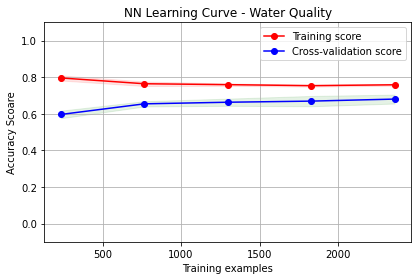

/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

In [211]:
plot_NN_learning_curve_comparision(scaled_Xtrain,ytrain)

In [208]:
def nn_validationCurve(X,y):
    
        
    train_score, test_score = validation_curve(MLPClassifier(random_state=42),X,y,param_name = 'max_iter',param_range=  np.arange(200, 600, 100))
    
    
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(np.arange(200, 600, 100), mean_train_score,label = "Training Score", color = 'b')
    plt.plot(np.arange(200, 600, 100), mean_test_score,label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with NN")
    plt.xlabel("max_iter")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.savefig('NNWQ_VALIDATIONCURVE.png',format='png',bbox_inches = "tight")
    
    plt.show()

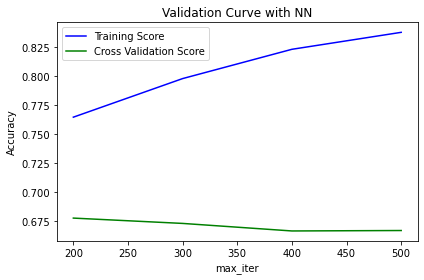

In [209]:
nn_validationCurve(scaled_Xtrain,ytrain)

In [84]:
def nn_validationCurve_comparision(X,y):
    
        
    train_score, test_score = validation_curve(MLPClassifier(random_state=42,
                                                             activation='logistic',
                                                             alpha=0.5,
                                                             hidden_layer_sizes= (50, 100, 50),
                                                             max_iter=200,
                                                            solver='adam'),X,y,param_name = 'max_iter',param_range=  np.arange(200, 600, 100))
    
    
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(np.arange(200, 600, 100), mean_train_score,label = "Training Score", color = 'b')
    plt.plot(np.arange(200, 600, 100), mean_test_score,label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with NN")
    plt.xlabel("max_iter")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend(loc = 'best')
    
    plt.show()

(2620, 9)
(2620,)


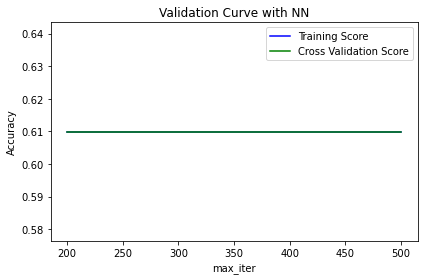

In [85]:
print(scaled_Xtrain.shape)
print(ytrain.shape)
nn_validationCurve_comparision(scaled_Xtrain,ytrain)


In [86]:
def NN_GV(X,y):
    start_time = time.time()
    
    model = MLPClassifier(random_state=42)
    
    
    param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                  'activation' :['tanh', 'relu'],
                  'alpha': [0.0001, 0.05],
                 'max_iter': [50, 100, 150]}

    
    gv = GridSearchCV(model, param_grid, cv=10)
    gv.fit(X,y)
    print(" It took %s seconds " % (time.time() - start_time))
    return gv.best_score_,gv.best_params_

In [87]:
NN_GV(scaled_Xtrain,ytrain)

/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rachanapandey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

 It took 869.8501460552216 seconds 


(0.6763358778625953,
 {'activation': 'tanh',
  'alpha': 0.0001,
  'hidden_layer_sizes': (100,),
  'max_iter': 100})

In [212]:
def NN_Tuning(x,y,xtext,Ytest):
    NN_learning_Curve = MLPClassifier(random_state=42,activation='tanh',alpha=0.0001,hidden_layer_sizes= (100),
                                                            max_iter=100,
                                                            solver='adam')
    
    
    
    NN_learning_Curve.fit(x,y)
    Ada_Predict = NN_learning_Curve.predict(xtext)
    accuracy_score(Ytest,Ada_Predict)
    
    print(confusion_matrix(Ytest, Ada_Predict))
      
    print ("Accuracy : ",accuracy_score(ytest, Ada_Predict)*100)
      
    print( classification_report(Ytest, Ada_Predict))


In [213]:
NN_Tuning(scaled_Xtrain,ytrain,scaled_Xtest,ytest)

[[375  25]
 [183  73]]
Accuracy :  68.29268292682927
              precision    recall  f1-score   support

         0.0       0.67      0.94      0.78       400
         1.0       0.74      0.29      0.41       256

    accuracy                           0.68       656
   macro avg       0.71      0.61      0.60       656
weighted avg       0.70      0.68      0.64       656

